In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
hd = pd.read_csv("C:\\Users\\ishwa\\Desktop\\Demo3.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
x = hd.drop("target",axis = 1)
y = hd["target"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
a1 = clf.score(x_test,y_test)
print("RandomForestClassifier :",a1)

RandomForestClassifier : 0.819672131147541


In [32]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
y_preds = clf.predict(x_test)
print(y_preds)
clf_report = classification_report(y_test , y_preds)
print(clf_report)
con_matrix = confusion_matrix(y_test , y_preds)
print(con_matrix)
acc_score = accuracy_score(y_test , y_preds)
print(acc_score)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.65      0.78        31
           1       0.73      1.00      0.85        30

    accuracy                           0.82        61
   macro avg       0.87      0.82      0.81        61
weighted avg       0.87      0.82      0.81        61

[[20 11]
 [ 0 30]]
0.819672131147541


In [33]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(x_test)
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.84, 0.72, 0.77, 0.91, 1.  , 0.52, 0.86, 0.76, 0.82, 0.8 ])

In [34]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label = "Roc")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC/AUC curve")
    plt.legend()
    plt.show()

In [35]:
fpr,tpr,thresholds = roc_curve(y_test , y_probs_positive)

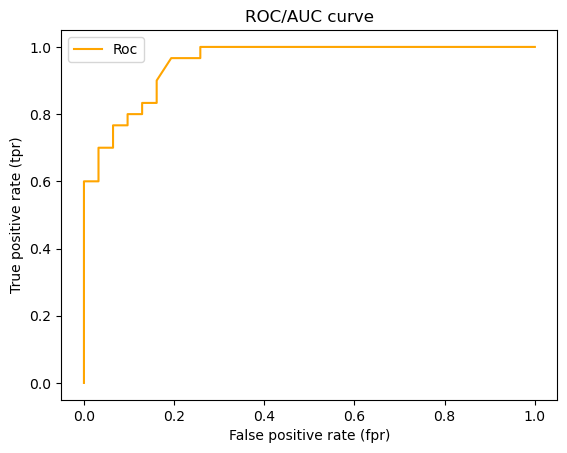

In [36]:
plot_roc_curve(fpr,tpr)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
grid = {"n_estimators": [10, 100, 200, 500],
 "max_depth": [None, 5, 10],
 "max_features": ["auto", "sqrt"],
 "min_samples_split": [2, 4, 6],
 "min_samples_leaf": [1, 2, 4]}

In [39]:
np.random.seed(42)

In [40]:
X =hd.drop("target", axis=1)
y = hd["target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
clf = RandomForestClassifier(n_jobs=1)

In [43]:
rs_clf = RandomizedSearchCV(estimator=clf,
 param_distributions=grid,
 n_iter=5, # number of models to try
 cv=3,
verbose=2)

In [44]:
rs_clf.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.7s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [45]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [46]:
rs_clf.best_score_

0.8141975308641975

In [47]:
import pickle
# Save an extisting model to file
pickle.dump(rs_clf, open("diabetes.pkl", "wb"))

In [48]:
loaded_pickle_model = pickle.load(open("diabetes.pkl", "rb"))

In [49]:
loaded_pickle_model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [50]:
loaded_pickle_model.predict([[63,1,3,145,233,1,0,150,1,2.3,0,0,1]])

C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [51]:
loaded_pickle_model.predict([[63,0,3,145,233,1,0,150,0,2.3,0,0,1]])

C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
loaded_pickle_model.predict([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

C:\Users\ishwa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)